In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


In [4]:
pip install imutils

In [5]:
pip install easyocr --user

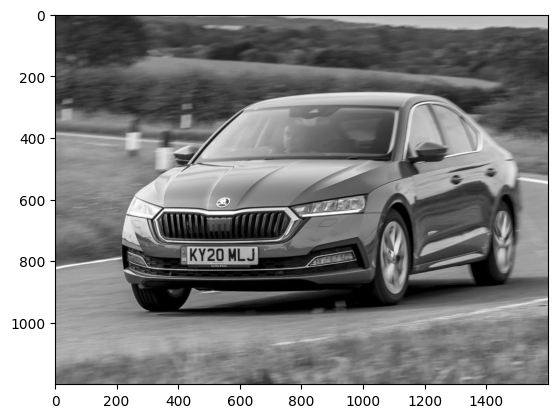

In [13]:
from skimage import io
img = io.imread(r'C:\Users\bberk\OneDrive\Masaüstü\car2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))





In [14]:
bfilter= cv2.bilateralFilter(img, 11, 17, 17) #noise reduction

In [15]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection


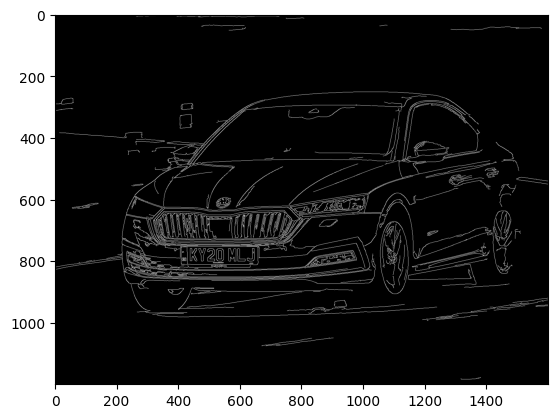

In [16]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [17]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [18]:
import numpy as np

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break


In [19]:
location

array([[[428, 756]],

       [[654, 754]],

       [[659, 807]],

       [[430, 811]]], dtype=int32)

In [20]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


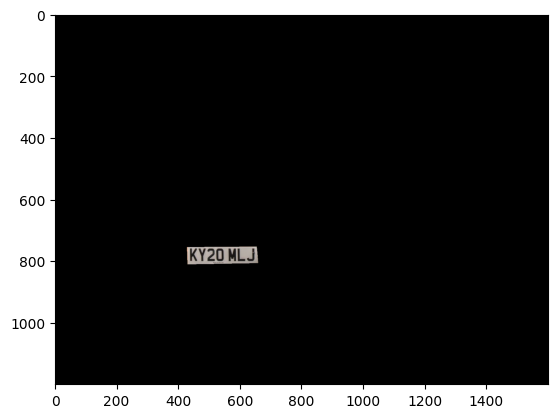

In [35]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [36]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]


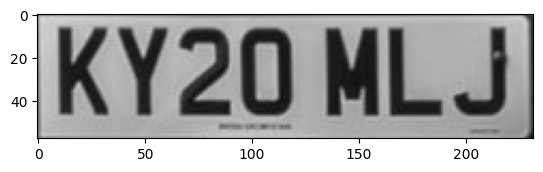

In [37]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [38]:
import easyocr 
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


[([[1, 0], [231, 0], [231, 58], [1, 58]], 'KY2O MLJ', 0.34974939306694586)]

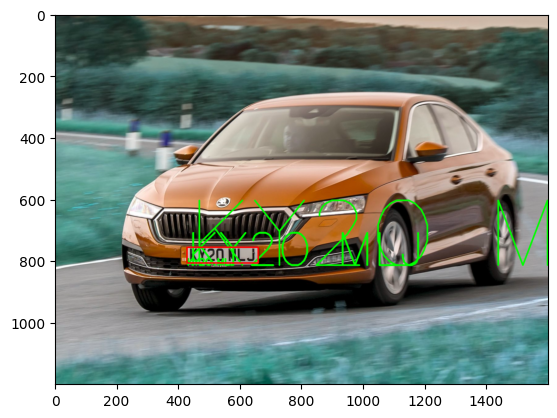

In [39]:
    text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
#res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=5, color=(0,255,0), thickness=4, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,0,255),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
